In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [85]:
data = pd.read_csv(r"C:\Users\tu.tong_onemount\Desktop\My others\Data python\2015.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [17]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [68]:
df = data.melt(id_vars=['Country','Region','Happiness Rank','Happiness Score'], var_name='dimension', value_name='value_dimension')
df.head()

,Country,Region,Happiness Rank,Happiness Score,dimension,value_dimension
0,Switzerland,Western Europe,1,7.587,Standard Error,0.03411
1,Iceland,Western Europe,2,7.561,Standard Error,0.04884
2,Denmark,Western Europe,3,7.527,Standard Error,0.03328
3,Norway,Western Europe,4,7.522,Standard Error,0.03880
4,Canada,North America,5,7.427,Standard Error,0.03553


Text(0.5, 1.01, 'Evaluation of the data')

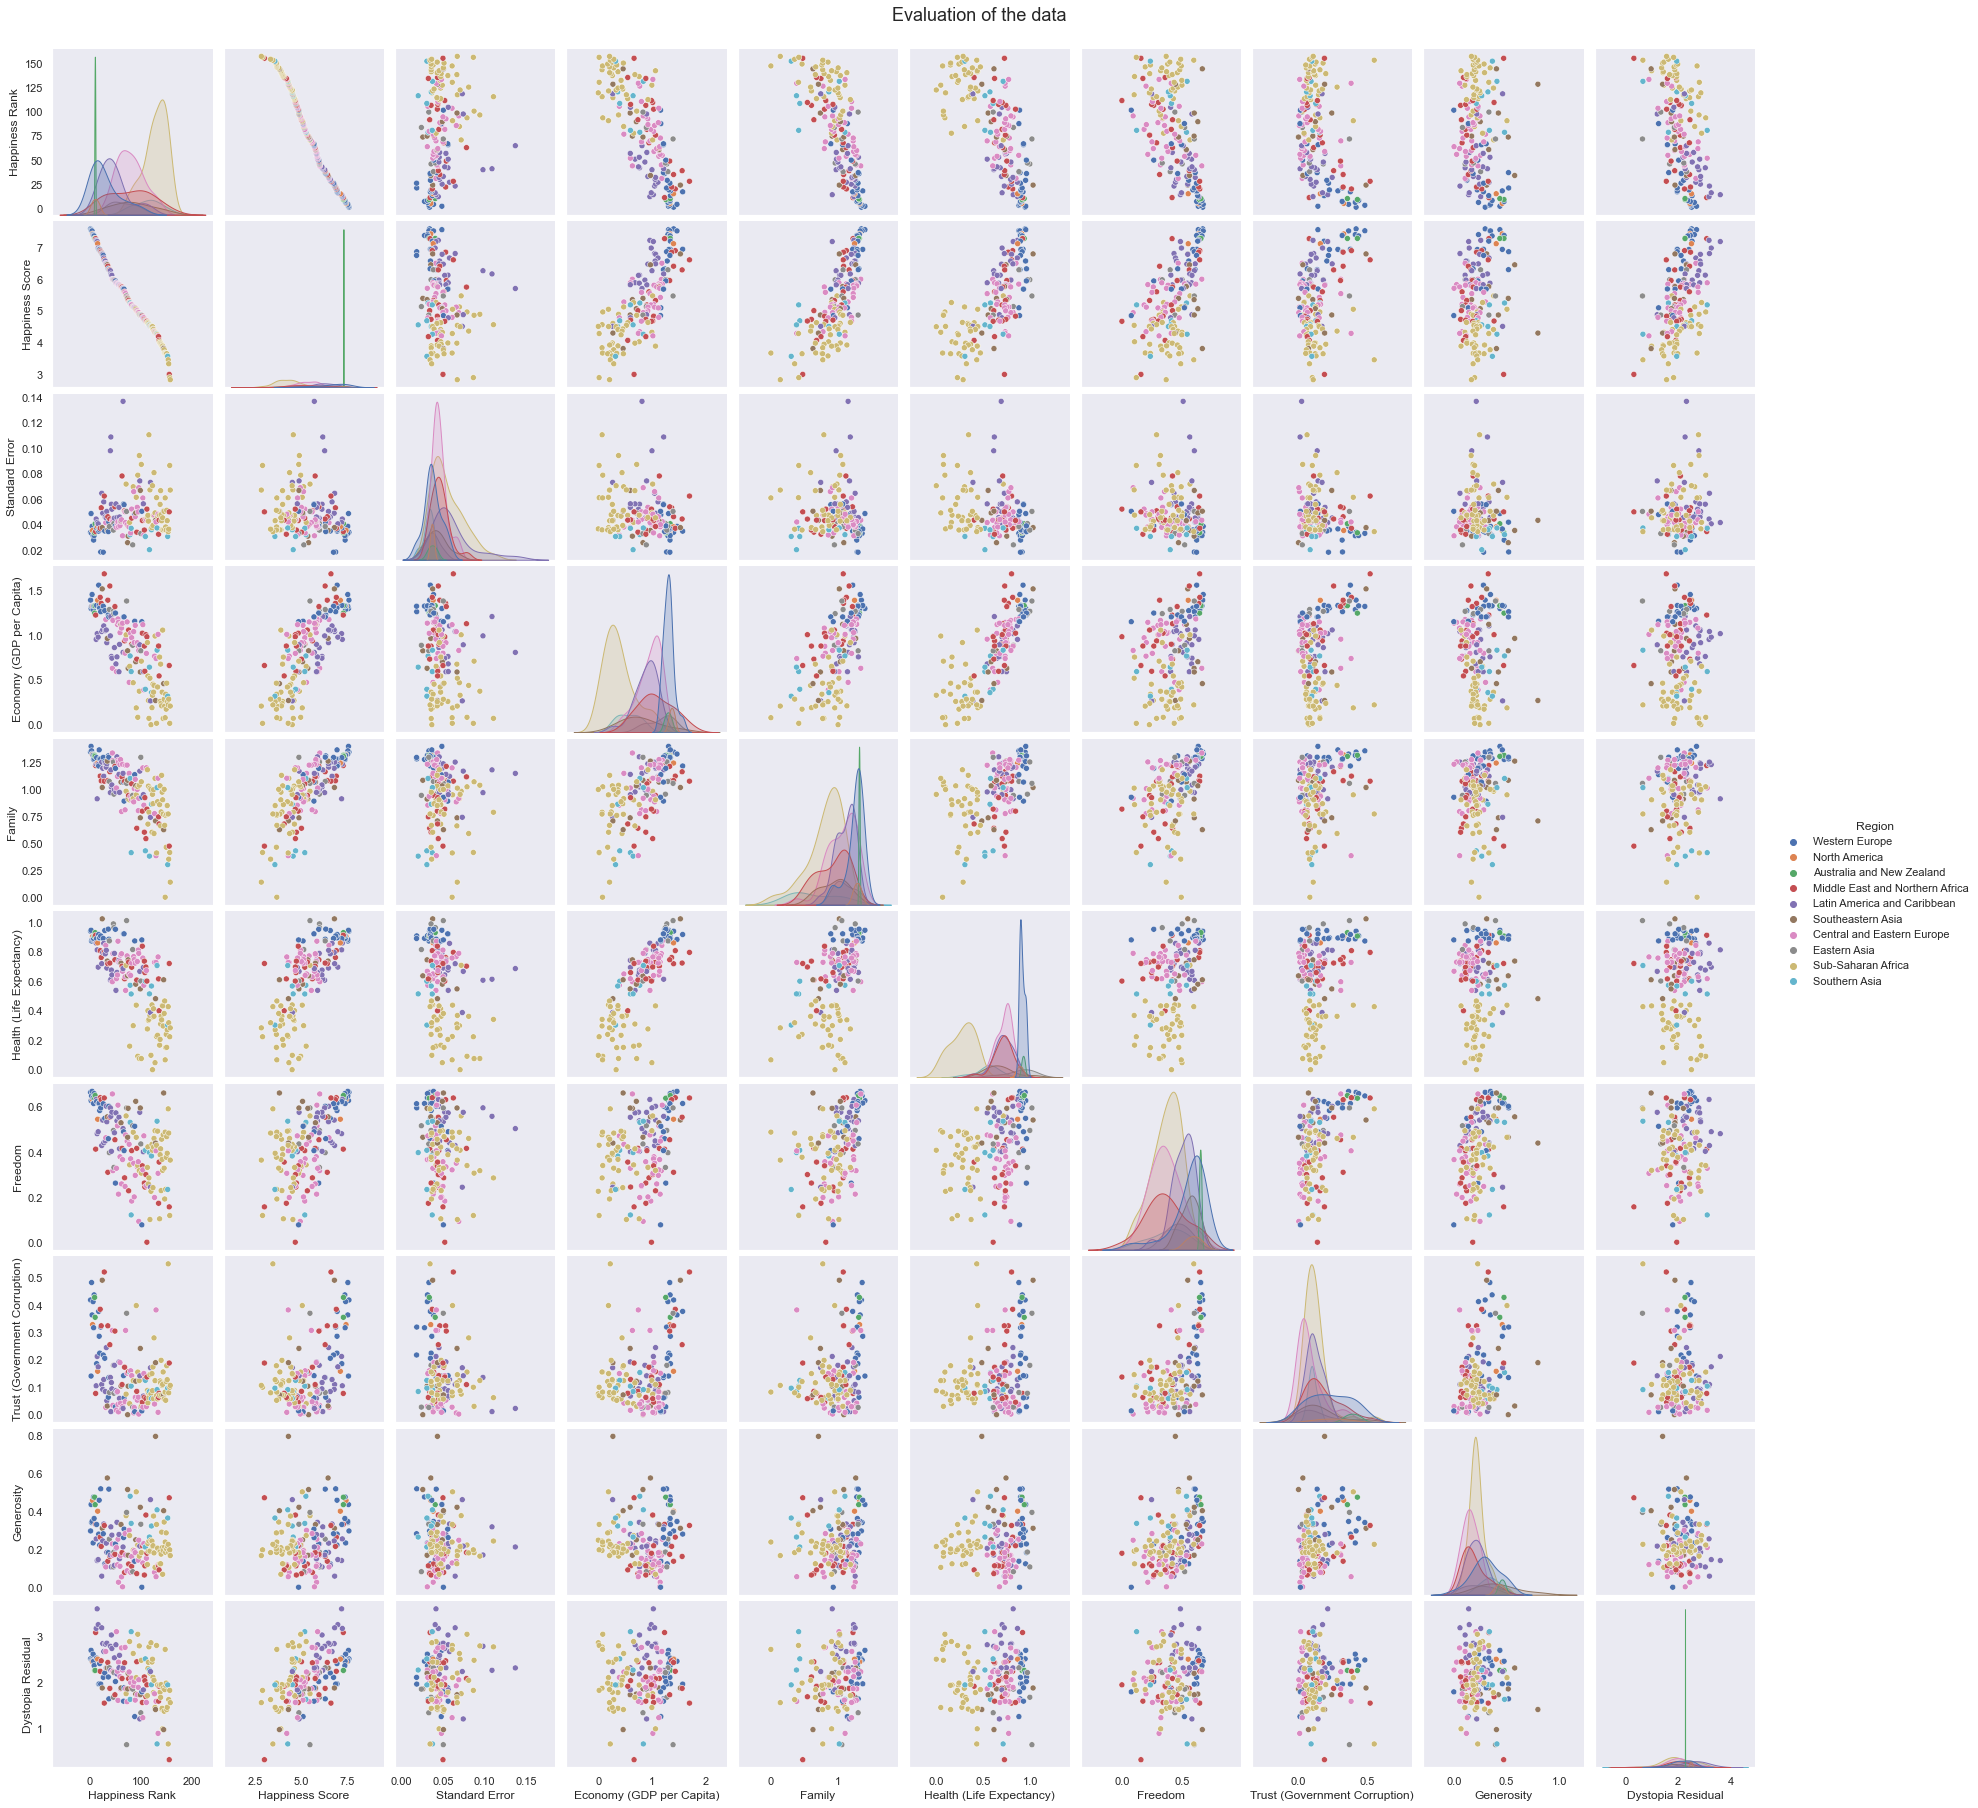

In [67]:
sns.pairplot(data,hue = 'Region')
plt.suptitle("Evaluation of the data", fontsize = 18, y = 1.01)

In [87]:
happiness_mean = data['Happiness Score'].mean()
data['is_happy'] = data['Happiness Score'].apply(lambda x: 0 if x < happiness_mean else 1)
data.head(100)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,is_happy
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367,0
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832,0
97,Dominican Republic,Latin America and Caribbean,98,4.885,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305,0
98,Laos,Southeastern Asia,99,4.876,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192,1.73799,0


There are large differences among happy and unhappy countries in health, economy and family issues.


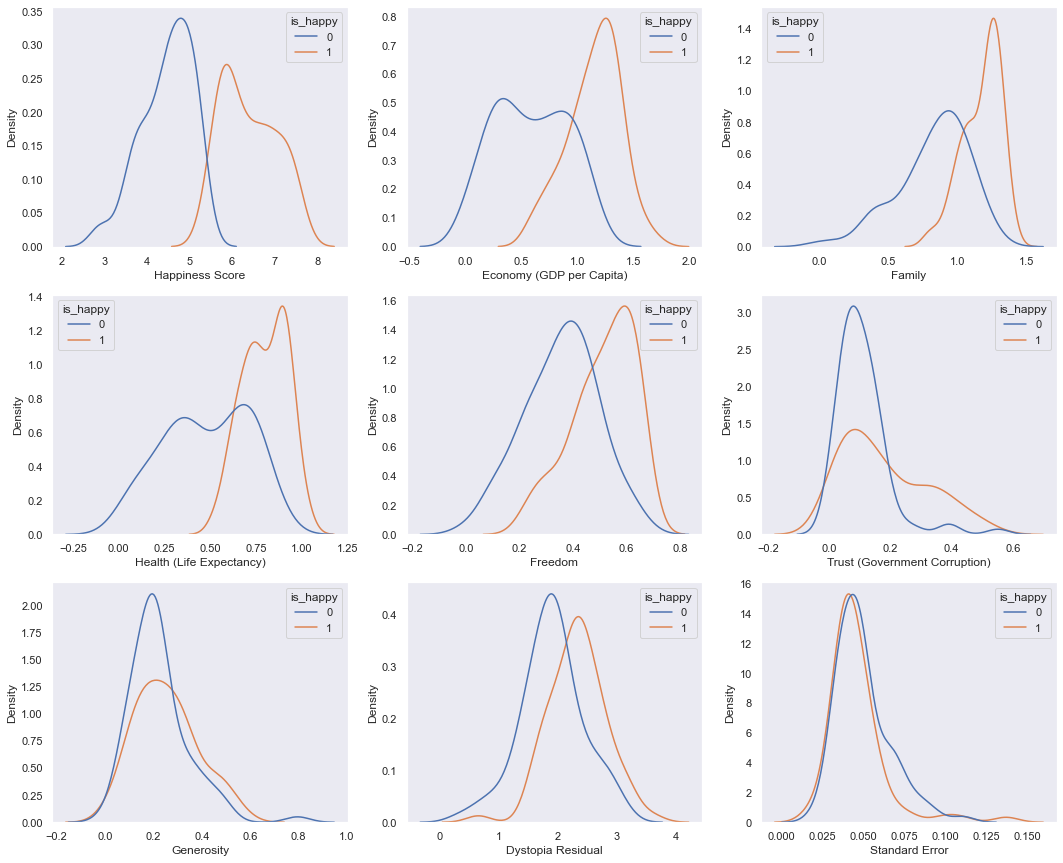

In [162]:
dimension = ['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
figure, axes = plt.subplots(3, 3, figsize=(18,15))

sns.kdeplot(ax=axes[0,0],data=data, x='Happiness Score',hue="is_happy")
sns.kdeplot(ax=axes[0,1],data=data, x='Economy (GDP per Capita)', hue="is_happy")
sns.kdeplot(ax=axes[0,2],data=data, x='Family', hue="is_happy")
sns.kdeplot(ax=axes[1,0],data=data, x='Health (Life Expectancy)', hue="is_happy")
sns.kdeplot(ax=axes[1,1],data=data, x='Freedom', hue="is_happy")
sns.kdeplot(ax=axes[1,2],data=data, x='Trust (Government Corruption)', hue="is_happy")
sns.kdeplot(ax=axes[2,0],data=data, x='Generosity', hue="is_happy")
sns.kdeplot(ax=axes[2,1],data=data, x='Dystopia Residual', hue="is_happy")
sns.kdeplot(ax=axes[2,2],data=data, x='Standard Error', hue="is_happy")

print('There are large differences among happy and unhappy countries in health, economy and family issues.')